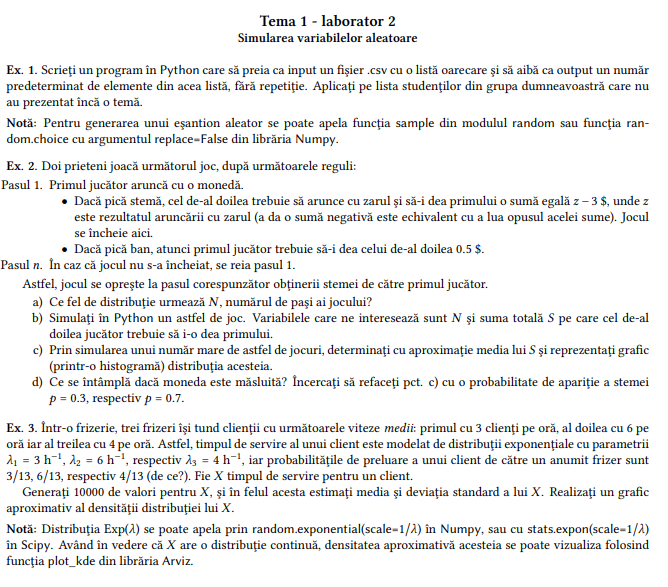

In [1]:
from IPython.display import Image

Image(filename="img.png")

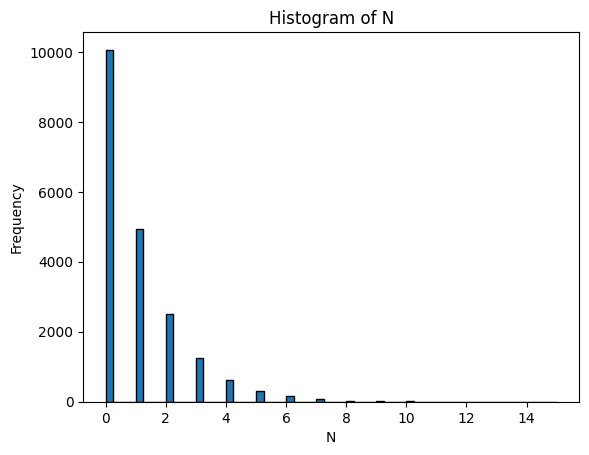

Mean with fair coin:  0.9946


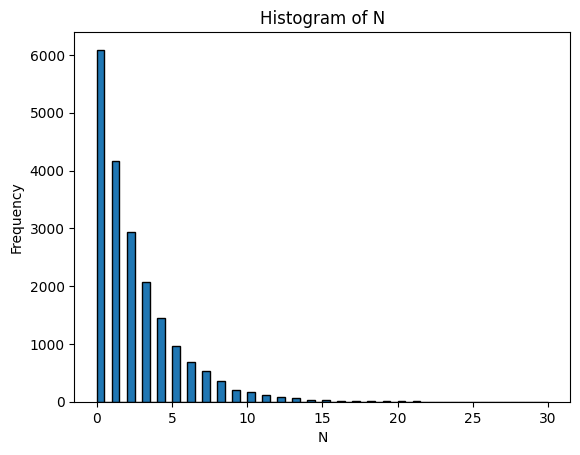

Mean with 0.3 tails probability:  2.30805


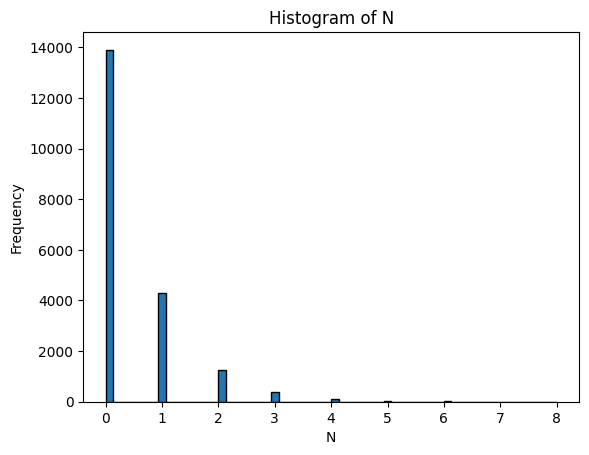

Mean with 0.3 tails probability:  0.4384


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

# a) N urmeaza o distributie exponentiala, P(1 pas) = 1/2, P(2 pasi) = 1/2^2, P(n pasi) = 1/2^n

# b)
def play(prob = 0.5):
    N = 0
    player2_debt = 0
    while(1):
        coin_flip = random.random()
        if(coin_flip < prob):
            dice = np.random.choice(range(6), size=1) + 1 # player2 throws dice, add 1 because random.choice picks from 0 to 5 in our line
            player2_debt = dice - 3
            break
        else:
            player2_debt -= 0.5
        N += 1
    return N, player2_debt

simulations = np.empty(20000)

for i in range(0, 20000):
    result = play(0.5)
    simulations[i] = result[0]

plt.hist(simulations, bins=60, edgecolor='black')

plt.title('Histogram of N')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

# c)
print("Mean with fair coin: ",simulations.mean())

# d)

simulations_03_tails = np.empty(20000)

for i in range(0, 20000):
    result = play(0.3)
    simulations_03_tails[i] = result[0]

plt.hist(simulations_03_tails, bins=60, edgecolor='black')

plt.title('Histogram of N')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

print("Mean with 0.3 tails probability: ", simulations_03_tails.mean())

simulations_07_tails = np.empty(20000)

for i in range(0, 20000):
    result = play(0.7)
    simulations_07_tails[i] = result[0]

plt.hist(simulations_07_tails, bins=60, edgecolor='black')

plt.title('Histogram of N')
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

print("Mean with 0.3 tails probability: ", simulations_07_tails.mean())

# Conclusion: The distribution becomes flatter as the probability of tails decreases because the mean of the exponential distribution increases(because heads is seen more often so the game goes on for longer on average)

Mean:  0.22826657389881602
Stdev:  0.24337580214275398


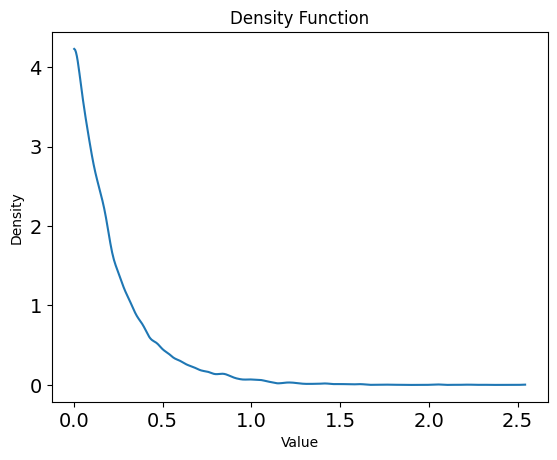

In [3]:
import numpy as np
import arviz as az
import matplotlib .pyplot as plt

def get_serve_time():
    nr_frizer = np.random.choice(range(13), size=1)
    X=0
    if(nr_frizer <= 2):
        X = np.random.exponential(scale=1/3)
    elif(nr_frizer <= 8):
        X = np.random.exponential(scale=1/6)
    else:
        X = np.random.exponential(scale=1/4)
    return X

simulations = np.empty(10000)

for i in range(0, 10000):
    simulations[i] = get_serve_time()

print("Mean: ", simulations.mean())
print("Stdev: ", simulations.std())

az.plot_kde(simulations)

plt.title('Density Function')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()